In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

In [3]:
train.head()

id  allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0   0               100.0       0.841611                  10.0            4.8   
1   1               100.0       7.558488                  10.0            4.8   
2   2                76.0       8.885992                  15.6            5.6   
3   3               100.0       8.795296                  10.0            4.8   
4   4               116.0       9.577996                  11.6            4.8   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0             20.612526           11.08810               2.766   
1             20.298893           12.04083               2.755   
2             33.739258           12.08630               2.828   
3             20.213349           10.94850               2.648   
4             24.988133           11.82448               2.766   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                  1.732                  0.860         0.496070   
1                  1.631                  0.910         0.492719   
2                  1.788                  0.864         0.481478   
3                  1.626                  0.936         0.489272   
4                  1.682                  0.896         0.492736   

   density_Average  Hardness  
0          0.91457       6.0  
1          0.71760       6.5  
2          1.50633       2.5  
3          0.78937       6.0  
4          1.86481       6.0

In [4]:
test.head()

id  allelectrons_Total  density_Total  allelectrons_Average  \
0  10407               884.0     121.420000                 35.36   
1  10408                90.0       9.931960                 18.00   
2  10409               116.0       7.767992                 11.60   
3  10410               100.0       9.107996                 10.00   
4  10411                55.0       4.030000                 11.00   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0           5.28             82.561240           9.370384               2.298   
1           5.60             39.568056          12.086300               2.868   
2           4.80             23.231818          11.023840               2.644   
3           4.80             20.298893          12.086300               2.828   
4           4.00             22.977675          11.280950               2.455   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                 1.9072               1.200000         0.461899   
1                 1.6520               0.864000         0.476196   
2                 1.7940               0.960000         0.499514   
3                 1.6620               0.792000         0.495796   
4                 1.7500               0.893333         0.476095   

   density_Average  
0          1.79459  
1          1.41194  
2          0.78834  
3          1.20466  
4          0.93456

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6939 non-null   int64  
 1   allelectrons_Total     6939 non-null   float64
 2   density_Total          6939 non-null   float64
 3   allelectrons_Average   6939 non-null   float64
 4   val_e_Average          6939 non-null   float64
 5   atomicweight_Average   6939 non-null   float64
 6   ionenergy_Average      6939 non-null   float64
 7   el_neg_chi_Average     6939 non-null   float64
 8   R_vdw_element_Average  6939 non-null   float64
 9   R_cov_element_Average  6939 non-null   float64
 10  zaratio_Average        6939 non-null   float64
 11  density_Average        6939 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 650.7 KB


In [7]:
train.describe()

id  allelectrons_Total  density_Total  allelectrons_Average  \
count  10407.00000        10407.000000   10407.000000          10407.000000   
mean    5203.00000          128.053516      14.491342             17.033222   
std     3004.38646          224.123776      15.972877             10.468734   
min        0.00000            0.000000       0.000000              0.000000   
25%     2601.50000           68.000000       7.558488             10.000000   
50%     5203.00000          100.000000      10.650000             12.600000   
75%     7804.50000          131.000000      16.676996             22.000000   
max    10406.00000        15300.000000     643.093804             67.000000   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
count   10407.000000          10407.000000       10407.000000   
mean        4.546789             37.507703          10.938308   
std         0.690864             26.012313           1.408276   
min         0.000000              0.000000           0.000000   
25%         4.000000             20.298893          10.590660   
50%         4.714286             26.203827          11.202760   
75%         4.800000             48.719500          11.670725   
max         6.000000            167.400000          15.245810   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
count        10407.000000           10407.000000           10407.000000   
mean             2.607662               1.731330               0.944132   
std              0.334906               0.192481               0.180017   
min              0.000000               0.000000               0.000000   
25%              2.530000               1.672500               0.864000   
50%              2.706000               1.732727               0.915556   
75%              2.805000               1.800000               0.981667   
max              3.443000               2.250000               1.615840   

       zaratio_Average  density_Average      Hardness  
count     10407.000000     10407.000000  10407.000000  
mean          0.493349         2.132984      4.647126  
std           0.063080         1.936656      1.680525  
min           0.000000         0.000000      1.000000  
25%           0.476196         0.814800      3.000000  
50%           0.488550         1.351550      5.500000  
75%           0.496070         2.741550      6.000000  
max           0.825990        10.970000     10.000000

In [8]:
test.describe()

id  allelectrons_Total  density_Total  allelectrons_Average  \
count   6939.000000         6939.000000    6939.000000           6939.000000   
mean   13876.000000          126.460128      14.794020             17.406186   
std     2003.261091          207.564499      18.982447             10.996089   
min    10407.000000            0.000000       0.000000              0.000000   
25%    12141.500000           68.000000       7.558488             10.000000   
50%    13876.000000          100.000000      10.650000             12.666667   
75%    15610.500000          128.000000      16.601328             22.000000   
max    17345.000000        10116.000000     643.093804             67.000000   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
count    6939.000000           6939.000000        6939.000000   
mean        4.546852             38.422790          10.921512   
std         0.683158             27.344351           1.378980   
min         0.000000              0.000000           0.000000   
25%         4.000000             20.298893          10.584314   
50%         4.750000             26.203827          11.202760   
75%         4.800000             48.719500          11.645560   
max         6.000000            167.400000          15.245810   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
count         6939.000000            6939.000000            6939.000000   
mean             2.608119               1.737907               0.949638   
std              0.322873               0.190584               0.179266   
min              0.000000               0.000000               0.000000   
25%              2.527500               1.678000               0.866667   
50%              2.706000               1.736000               0.920000   
75%              2.806667               1.820000               0.990000   
max              3.443000               2.250000               1.615333   

       zaratio_Average  density_Average  
count      6939.000000      6939.000000  
mean          0.491675         2.152065  
std           0.060829         1.958213  
min           0.000000         0.000000  
25%           0.476095         0.812440  
50%           0.488550         1.351550  
75%           0.496118         2.780220  
max           0.825990        10.970000

In [9]:
train.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [10]:
test.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

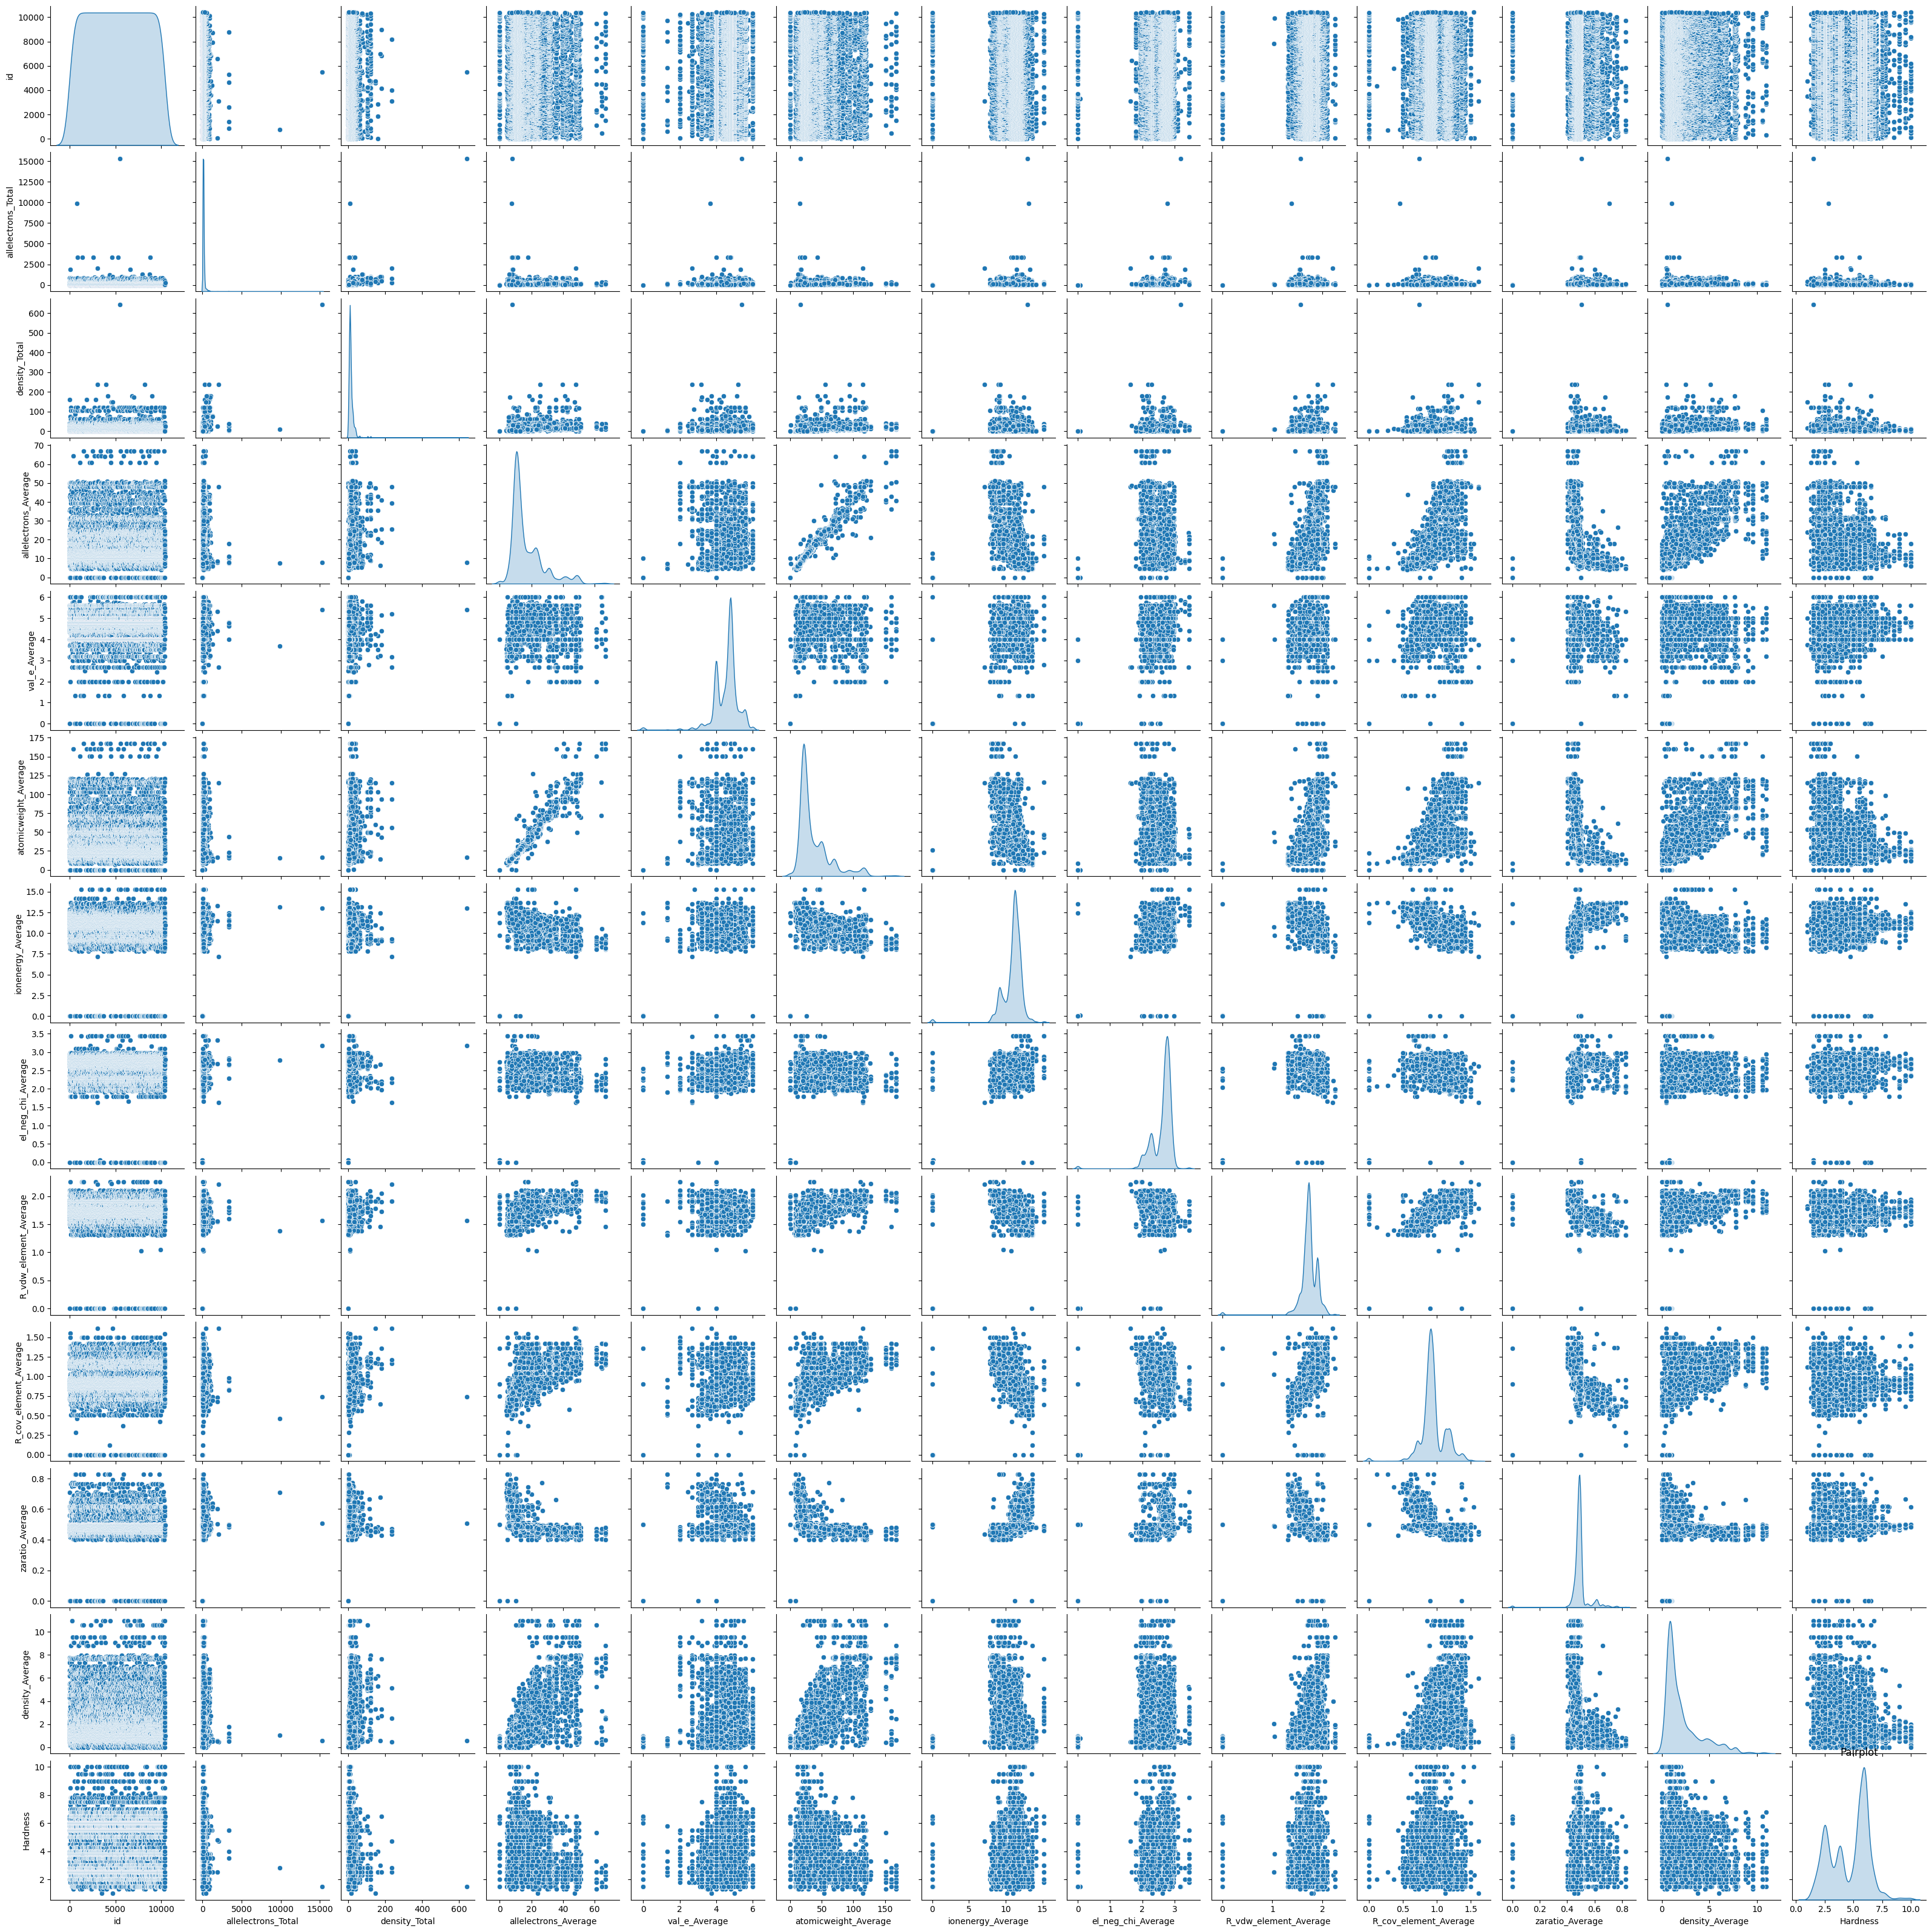

In [11]:
sns.pairplot(train, diag_kind='kde')
plt.title("Pairplot")
plt.show()

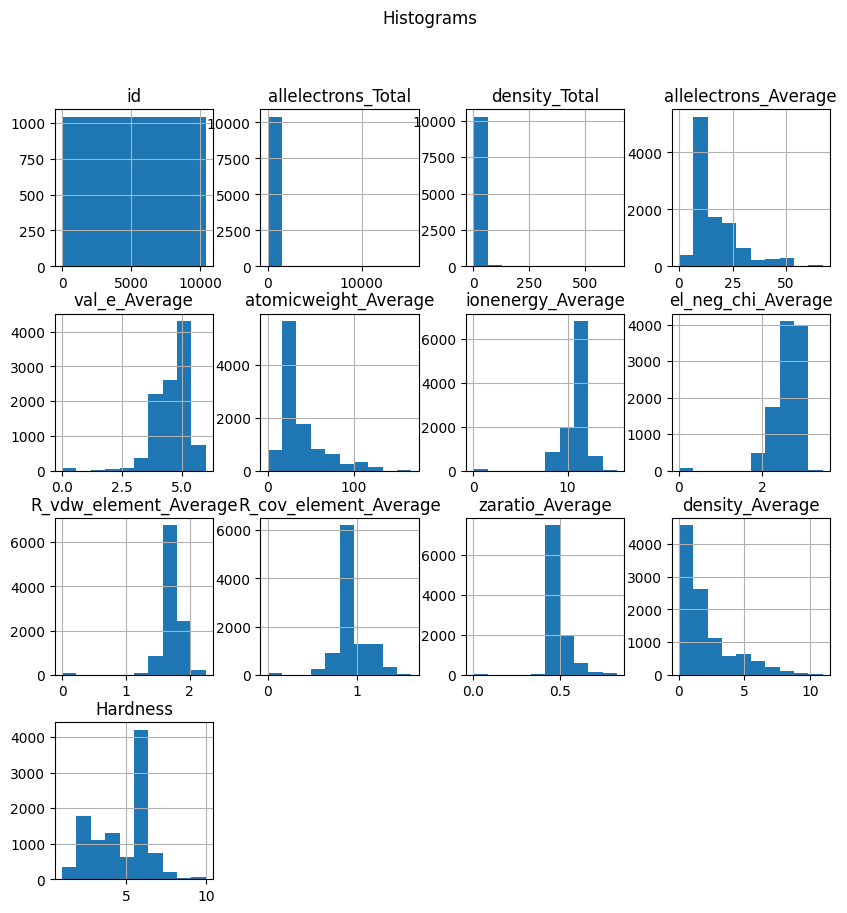

In [12]:
train.hist(figsize=(10,10))
plt.suptitle("Histograms")
plt.show()

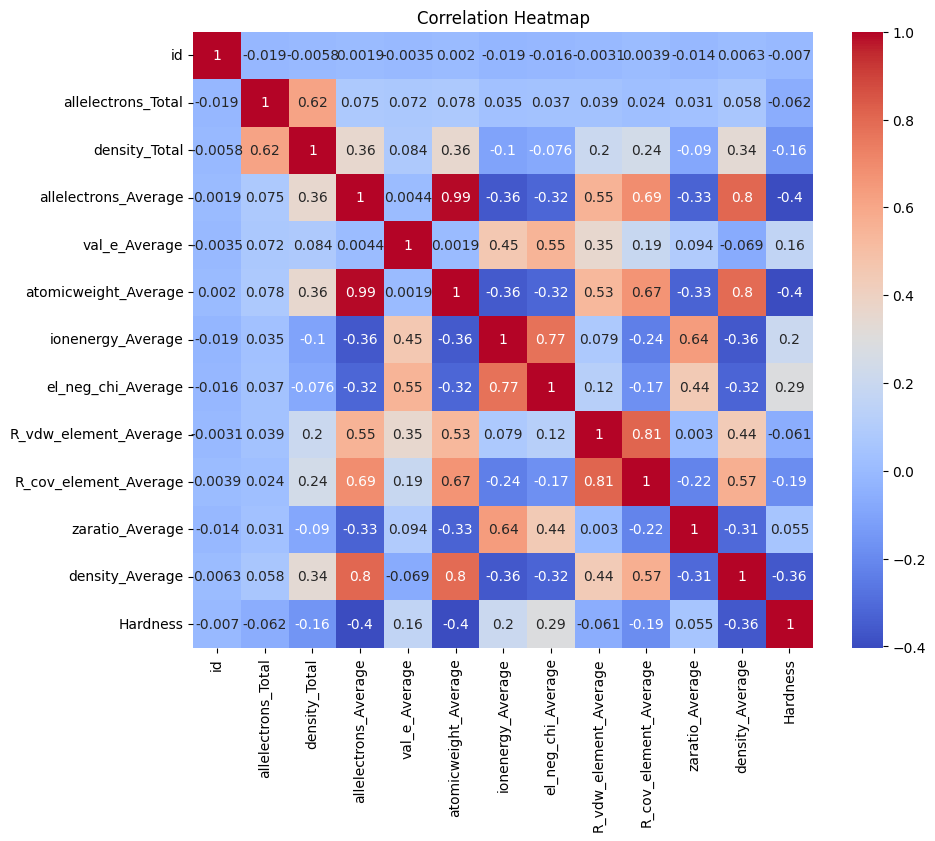

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
train1=train.drop(['id'],axis=1)
test1=test.drop(['id'],axis=1)

In [15]:
x = train1.drop(["Hardness"], axis=1).to_numpy()
y = train1["Hardness"].to_numpy()

In [16]:
st=StandardScaler()
x=st.fit_transform(x)
test1=st.fit_transform(test1)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 42,shuffle=True)

In [18]:
random_forest = RandomForestRegressor()
linear_regression = LinearRegression()

In [19]:
random_forest.fit(x_train, y_train)
linear_regression.fit(x_train, y_train)

LinearRegression()

In [20]:
rf_predictions = random_forest.predict(x_test)
lr_predictions = linear_regression.predict(x_test)

In [21]:
# Calculate metrics for Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R^2 Score:", rf_r2)

Mean Squared Error: 1.5372870015609992
Mean Absolute Error: 0.9218599903938519
R^2 Score: 0.4344200932835228


In [22]:
# Calculate metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Mean Squared Error:", lr_mse)
print("Mean Absolute Error:", lr_mae)
print("R^2 Score:", lr_r2)


Mean Squared Error: 2.105493781448889
Mean Absolute Error: 1.1720158518910546
R^2 Score: 0.22537237659929954


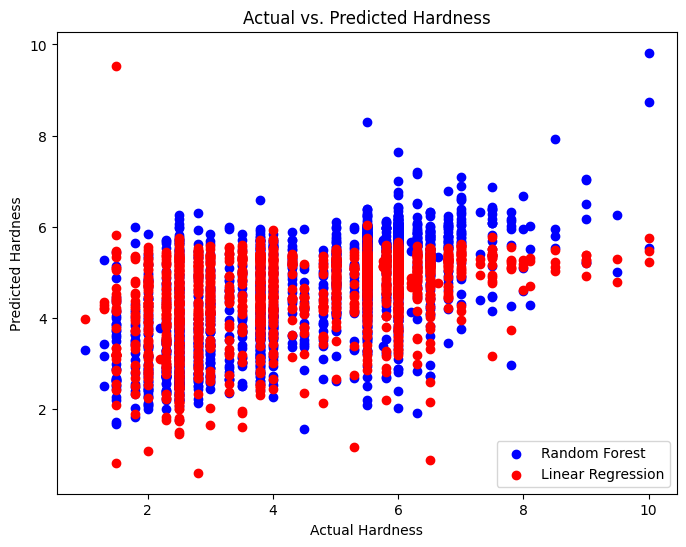

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest')
plt.scatter(y_test, lr_predictions, color='red', label='Linear Regression')
plt.xlabel('Actual Hardness')
plt.ylabel('Predicted Hardness')
plt.title('Actual vs. Predicted Hardness')
plt.legend()
plt.show()

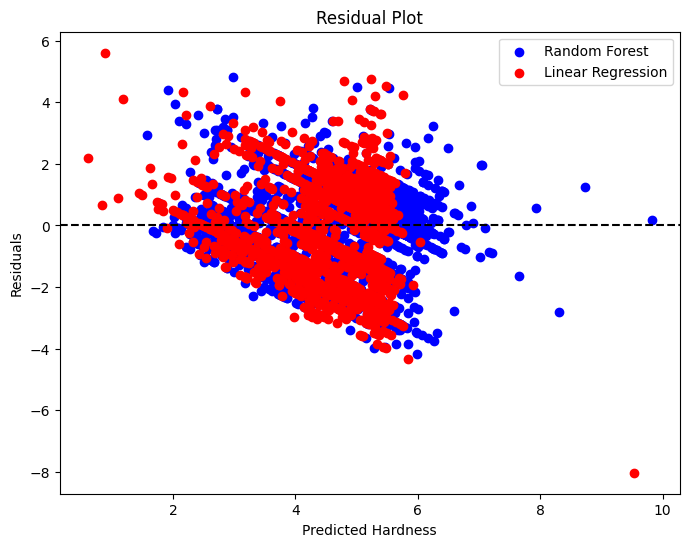

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(rf_predictions, y_test - rf_predictions, color='blue', label='Random Forest')
plt.scatter(lr_predictions, y_test - lr_predictions, color='red', label='Linear Regression')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Hardness')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

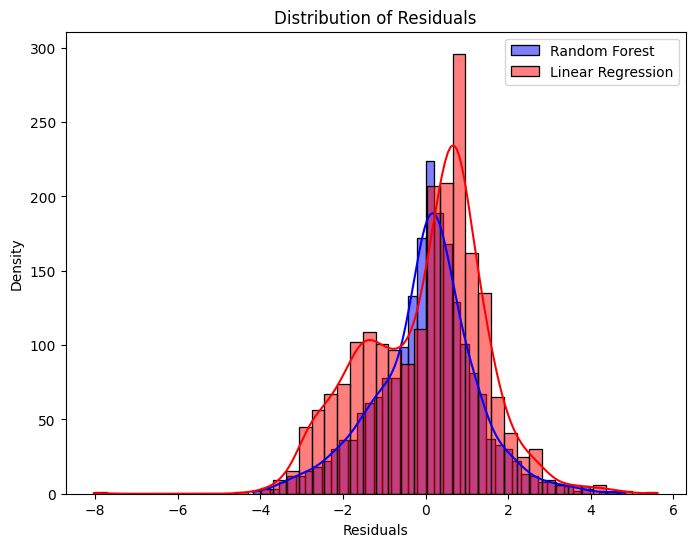

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test - rf_predictions, color='blue', kde=True, label='Random Forest')
sns.histplot(y_test - lr_predictions, color='red', kde=True, label='Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.legend()
plt.show()

In [26]:
submission = pd.DataFrame()
submission['id'] = test['id']
final_predictions = random_forest.predict(test1)
submission['Hardness'] = final_predictions
submission.to_csv('submission.csv', index=False)